<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100"/>

<div style='color: #690027;' markdown="1">
    <h1>CLASSIFICATIE VAN DE MNIST DATASET MET EEN CONVOLUTIONEEL NEURAAL NETWERK</h1> 
</div>

<div class="alert alert-box alert-success">
Deze notebook bevat een <em>concreet voorbeeld van een convolutioneel neuraal netwerk</em> dat wordt opgebouwd met de functionaliteiten van de Python-module <em>Keras</em>. <br>
Het voorbeeld betreft een probleem van <em>multiklassenclassificatie</em>, nl. het classificeren van grijswaardenafbeeldingen van handgeschreven cijfers. 
</div>

De afbeeldingen worden aangeboden in een formaat van 28x28 pixels; er zijn 10 
klassen, nl. klassen met labels 0 t.e.m. 9. 

Om het netwerk te trainen wordt gebruikgemaakt van de MNIST dataset. Deze dataset bestaat uit 60 000 afbeeldingen om het netwerk te trainen en  10 000 afbeeldingen om het netwerk te testen. <br>
Deze afbeeldingen werden verzameld door het National Institute of Standards and Technology (de NIST in het letterwoord MNIST) in de jaren 80. 

### Nodige modules importeren

In deze notebook bouw je net als in de andere MNIST-notebooks een *Sequential model* op met Keras. <br> 
Dat is een model dat bestaat uit *aaneengeschakelde lagen*. 
Je zal werken met een neuraal netwerk dat eerst enkele *convolutionele layers*, afgewisseld met een *max pooling*-operatie, bevat en tot slot een *feedforward* netwerk.<br>
Volgens de regels van de kunst werk je met trainingdata, validatidata en testdata. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

Using TensorFlow backend.


<div style='color: #690027;' markdown="1">
    <h2>1. Inlezen van de data</h2> 
</div>

De MNIST data bestaan uit een koppel. Bovendien is elk van beide elementen van het koppel zelf een koppel.  

De data zijn als volgt opgebouwd:
-  (trainingdata, overeenkomstige labels) in het eerste element;
-  (testdata, overeenkomstige labels) in het tweede element.

De data bestaan dus uit vier soorten data.

Je laadt de dataset in met de instructie `mnist.load_data()`.<br>
`load_data()` is een functie van de module `mnist`. <br>Ondertussen benoem je vier variabelen die elk verwijzen naar een bepaalde soort data in de dataset.  

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()      # elementen van tuples krijgen juiste naam

In [8]:
train_images[4].shape

(28, 28)

De trainingdata worden opgesplitst in effectieve trainingdata en valideringsdata. Deze validatieset zal gebruikt worden om de prestatie van het netwerk te monitoren tijdens het trainen. Zo kan men sneller overfitting gaan opsporen.

In [3]:
validation_images = train_images[0:5000]
validation_labels = train_labels[0:5000]
train_images =  train_images[5000:]
train_labels = train_labels[5000:]

<div style='color: #690027;' markdown="1">
    <h2>3. Opbouwen van het neuraal netwerk</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>3.1 Architectuur van het neuraal netwerk</h3> 
</div>

In [10]:
# architectuur netwerk     https://keras.io/getting-started/sequential-model-guide/

# 'Sequential model' is model dat bestaat uit aaneengeschakelde lagen
# Hier eerst enkele lagen die samen convolutioneel netwerk vormen, 
# afgewisseld met Max Pooling die de resolutie van de afbeeldingen vermindert (minder rekenkracht nodig).
# Convolutioneel netwerk wordt gevolgd door netwerk met dense layers:
# (feed forward netwerk met) 1 hidden layer;
# 'dense layers'  betekent 'fully connected', 
# d.w.z. dat neuronen in bepaalde laag met alle neuronen in vorige laag zijn verbonden.
# Bij de eerste convolutionele layer moet je input_shape opgeven ipv input_dim (input_dim wordt niet ondersteund). 
# Deze input_shape is de dimensie van één ingevoerd datapunt, dus hier 1 MNIST afbeelding.
# Een convolutionele layer verwacht een 3D-tensor voor een afbeelding, zoals voor een RGB-afbeelding.
# Model moet weten welke vorm van input het kan verwachten, m.a.w. dimensie van de inputpunten,
# daarom wordt dit aan eerste laag van Sequential model meegegeven;
# enkel aan de eerste want volgende lagen krijgen dat automatisch, door uitvoeren wiskundige bewerkingen. 
# Loss-functie moet geminimaliseerd worden m.b.v. optimizer;
# met metrics ga je performantie van model na.

# architectuur netwerk
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))) # eerste convolutionele laag met activatie ReLU
network.add(layers.MaxPooling2D((2,2)))                         # max pooling operatie
network.add(layers.Conv2D(64, (3,3), activation='relu'))        # tweede convolutionele laag met activatie ReLU
network.add(layers.MaxPooling2D((2,2)))                         # max pooling operatie
network.add(layers.Conv2D(64, (3,3), activation='relu'))        # derde convolutionele laag met activatie ReLU
network.add(layers.Flatten())                                   # nodig om output aan dense layers te kunnen geven
network.add(layers.Dense(64, activation='relu'))                # hidden layer  64 neuronen, activatie ReLU
network.add(layers.Dense(10, activation='softmax'))             # output layer  10 outputneuronen, activatie softmax
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])                           # optimizer, loss en metrics kiezen

<div style='color: #690027;' markdown="1">
    <h3>3.2 Trainen van het neuraal netwerk</h3> 
</div>

Hiervoor vroeg je `train_images.shape` op. De datapunten zijn dus matrices. Deze datapunten moeten echter aangeboden worden als vectoren. 

De dimensie van elke vector ligt vast in de architectuur van het model. Elk datapunt moet dus omgevormd worden naar een vector met dimensie 784. 

De 60 000 28x28-matrices moeten dus omgevormd worden tot vectoren, of m.a.w. je moet de trainingset omvormen van een stapel van 60 000 28x28-matrices naar een stapel van 60 000 vectoren.

Bovendien is het beter de waarden van de afbeeldingen te *normaliseren*. 

<div class="alert alert-block alert-warning"> 
Meer uitleg over normaliseren vind je in de notebook 'Standaardiseren'.
</div>

In [11]:
# trainen van netwerk

# merk op dat de input_shape van hidden layer vastligt in de architectuur
# de 60000 28x28-matrices moeten dus omgevormd worden tot een vector met lengte 28 * 28  dus lengte 784
# trainingset omvormen van stapel van 60000 28x28-matrices naar stapel van 60000 vectoren

train_images = train_images.reshape((55000, 28, 28, 1))      
train_images = train_images.astype('float32') / 255      # data normaliseren: herschalen naar interval [0,1] ipv [0,255]
validation_images = validation_images.reshape((5000, 28, 28, 1))      
validation_images = validation_images.astype('float32') / 255  
# testset van stapel van 10000 28x28-matrices omvormen naar stapel van 10000 vectoren
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [12]:
# one hot encoding
# labels opslaan in andere gedaante bv. 0 wordt 1000000000, 1 wordt 0100000000, ..., 7 wordt 00000001000 ... 
# dus voor 7 een 1 op plaats met index 7 ( je begint te tellen vanaf 0) en voor de rest nullen 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
validation_labels = to_categorical(validation_labels)

In [13]:
# trainen met de methode fit van network, m.a.w. de prenten en de labels op elkaar afstemmen
# 3 epochs, dus 3 keer de trainingset doorlopen
# batch_size = 64: bij elke epoch worden 64 trainingsafbeeldingen willekeurig uit de trainingset gekozen
# steeds 64 prenten per keer gebruiken om de optimizer op toe te passen, dus gemiddelde aanpassing over de 64 punten
# merk op dat na elke epoch de loss en accuracy vermeld worden, nl. na elke bach
history = network.fit(train_images, train_labels, epochs=3, batch_size=64, validation_data=(validation_images, validation_labels))
loss = history.history["loss"]
epochs = range (1 , len(loss) +1)
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 42s 761us/step - loss: 0.9499 - accuracy: 0.7256 - val_loss: 0.3155 - val_accuracy: 0.9026
Epoch 2/5
55000/55000 [==============================] - 42s 767us/step - loss: 0.2345 - accuracy: 0.9283 - val_loss: 0.1699 - val_accuracy: 0.9474
Epoch 3/5
55000/55000 [==============================] - 43s 786us/step - loss: 0.1562 - accuracy: 0.9519 - val_loss: 0.1300 - val_accuracy: 0.9628
Epoch 4/5
55000/55000 [==============================] - 42s 757us/step - loss: 0.1192 - accuracy: 0.9637 - val_loss: 0.2144 - val_accuracy: 0.9268
Epoch 5/5
55000/55000 [==============================] - 42s 773us/step - loss: 0.1005 - accuracy: 0.9692 - val_loss: 0.0845 - val_accuracy: 0.9760


Zie je dat de loss daalt en de accuracy stijgt?

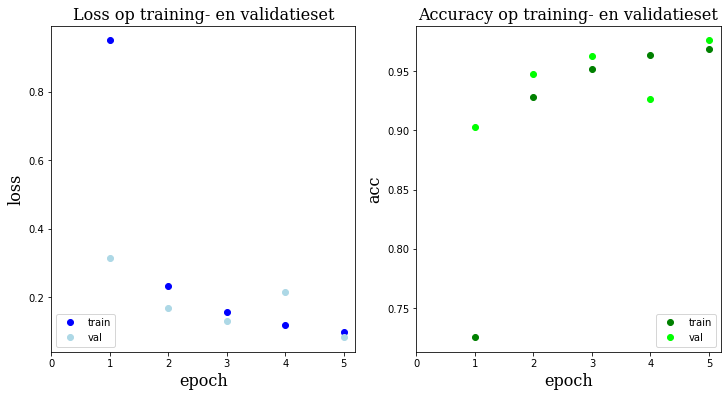

In [14]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, loss, "o", color="blue", label="train")
plt.plot(epochs, val_loss, "o", color="lightblue", label="val")
plt.xticks(np.arange(0, 6, step=1))             
plt.title("Loss op training- en validatieset", fontdict=font)
plt.xlabel("epoch", fontdict=font)
plt.ylabel("loss", fontdict=font)
plt.legend(loc="lower left")

plt.subplot(1,2,2)
plt.plot(epochs, acc, "o", color="green", label="train")
plt.plot(epochs, val_acc, "o", color="lime", label="val")
plt.xticks(np.arange(0, 6, step=1)) 
plt.xlabel("epoch", fontdict=font)
plt.ylabel("acc", fontdict=font)
plt.title("Accuracy op training- en validatieset", fontdict=font)
plt.legend(loc="lower right")

plt.show()

De nauwkeurigheid van het netwerk is na de training behoorlijk. De fout is wel nog groot.

<div style='color: #690027;' markdown="1">
    <h3>3.3 Werking van het model</h3> 
</div>

Door de volgende code-cel uit te voeren, neem je twee datapunten uit de trainingset. Eerst wordt ervoor gezorgd dat je werkt met het juiste formaat.

In [15]:
voorbeeld1 = train_images[4]
voorbeeld2 = train_images[100]
# labels
print(train_labels[4], train_labels[100]) 

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Je zorgt ervoor dat je met het juiste formaat werkt.

In [16]:
# datapunten voorbereiden
# normalisatie is reeds gebeurd
voorbeeld1 = voorbeeld1.reshape((1, 28, 28, 1)) 
voorbeeld2 = voorbeeld2.reshape((1, 28, 28, 1)) 

De methode `predict()` geeft een array terug waarin staat hoe zeker het model is dat het aangeboden datapunt een 0, een 1, een 2, enz. is, in die volgorde. Die zekerheden worden uitgedrukt in procent.

In [17]:
# testen
network.predict(voorbeeld1)

array([[9.5384200e-07, 9.9918050e-01, 6.9616006e-05, 2.8610716e-06,
        2.8629333e-04, 3.5369869e-06, 1.5937495e-04, 3.8118164e-05,
        2.3244382e-04, 2.6294098e-05]], dtype=float32)

In [18]:
# testen
network.predict(voorbeeld2)

array([[1.9570748e-06, 2.2778827e-06, 1.2966701e-03, 1.0602619e-04,
        1.0476371e-07, 3.1044695e-07, 6.3946563e-11, 9.9791890e-01,
        6.2784088e-06, 6.6746527e-04]], dtype=float32)

Vul in en verwijder wat niet past:

Het model is het meest zeker dat het een .... is. <br>
Die zekerheid is .... <br>
Correct/Foutief geclassificeerd!

<div style='color: #690027;' markdown="1">
    <h3>3.3 Prestatie van het model</h3> 
</div>

Het is niet omdat het model goed presteert op de trainingdata dat het ook goed presteert op ongeziene data. Je gaat dus na hoe de loss en accuracy zijn op de testdata. 

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 229us/step


In [21]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.0744981709163636
test_acc: 0.9753999710083008


Vergelijk de nauwkeurigheid op de testset met die op de trainingset. Generaliseert het model goed?

<div style='color: #690027;' markdown="1">
    <h3>3.4 Model testen op eigen data</h3> 
</div>

Kan het model ook cijfers herkennen die we zelf schreven? Probeer het uit.
Upload eerst de nodige files.

In [47]:
# drie afbeeldingen van handgeschreven cijfers
# 28 op 28 pixels, wit op donkere achtergrond
# genormaliseerd
zeven = np.loadtxt("data/zeven.dat")       # ´loadtxt´ voor dat-file, ´load´ voor npy-file
vier = np.loadtxt("data/vier.dat")       
twee = np.loadtxt("data/twee.dat")

In [48]:
print(zeven)

[[0.         0.00392157 0.         0.00392157 0.00392157 0.00392157
  0.         0.00392157 0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.00392157
  0.01176471 0.         0.         0.         0.01568627 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.01960784 0.         0.         0.
  0.01568627 0.         0.00392157 0.00392157 0.00392157 0.
  0.         0.         0.         0.00784314 0.         0.
  0.         0.         0.01568627 0.00392157 0.         0.00392157
  0.         0.         0.         0.        ]
 [0.02352941 0.         0.         0.         0.         0.4627451
  0.42745098 0.47843137 0.52156863 0.5254902  0.53333333 0.5372549
  0.5372549  0.54509804 0.56470588 0.58431373 0.11764706 0.01568627
  0.00392157 0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.01960784 0.15686275
  0.17254902 0.08

In [49]:
print(np.min(zeven), np.max(zeven))

0.0 0.6862745098039216


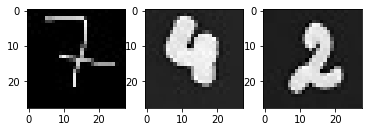

In [50]:
plt.figure()

plt.subplot(1,3,1)
plt.imshow(zeven, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(vier, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(twee, cmap="gray")

plt.show()

Gelijken deze cijfers voldoende op die van de dataset?
Waarom is dat van belang?

Antwoord:

De datapunten hebben de vorm van matrices.

Bekijk hoe het model presteert op deze cijfers.

In [51]:
# data voorbereiden, reeds genormaliseerd
zeven = zeven.reshape((1, 28, 28, 1))              # omvormen naar tensor die 1 vector bevat
vier = vier.reshape((1, 28, 28, 1))
twee = twee.reshape((1, 28, 28, 1))

In [52]:
network.predict(zeven)

array([[0.00078087, 0.05508068, 0.33511835, 0.1555052 , 0.24781024,
        0.01589944, 0.02605996, 0.03681158, 0.10211876, 0.02481482]],
      dtype=float32)

In [53]:
network.predict(vier)

array([[2.9887385e-06, 5.3915297e-05, 8.5175881e-05, 2.0151836e-04,
        8.0824465e-01, 3.3141123e-04, 1.3428849e-05, 1.4577511e-04,
        8.6024804e-03, 1.8231869e-01]], dtype=float32)

In [54]:
network.predict(twee)

array([[2.0111559e-04, 3.6123851e-03, 9.7369069e-01, 1.8920086e-02,
        2.1858139e-06, 1.0568580e-05, 4.6045145e-05, 1.2334847e-05,
        3.4861472e-03, 1.8416204e-05]], dtype=float32)

Hoe presteert het model op deze zelfgeschreven cijfers?<br>
Antwoord:

### Opdracht 3.1
Schrijf zelf enkele cijfers en test uit of het model jouw handschrift leest!

Besluit: 

<div style='color: #690027;' markdown="1">
    <h2>4. Op zoek naar een beter model</h2> 
</div>

### Opdracht 4.1
Pas het aantal neuronen en het aantal epochs in de netwerk-architectuur aan om de prestaties van het netwerk te verbeteren. 

Wie haalt de beste nauwkeurigheid?

Tip: Het verschil tussen de training accuracy en de test accuracy is belangrijk. Als de training accuracy groter is dan de test accuracy, dan spreekt men van *overfitting*: het feit dat het model slechter gaat presteren op nieuwe data dan op de trainingdata.

### Opdracht 4.2
Test je model uit op je eigen cijfers.

<div style='color: #690027;' markdown="1">
    <h2>5. Evaluatie</h2> 
</div>

De beste nauwkeurigheid die mijn model haalt is ........ voor de trainingset, .... voor de validatieset en .... voor de testset.

Wat vind je van deze opdracht?

.............

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Chollet, F. (2018). *Deep learning with Python*. Manning publications co.<br>
[2] Getting started with the Keras Sequential model. Geraadpleegd op 25 september 2019 via https://keras.io/getting-started/sequential-model-guide/.

<div>
    <h2>Met steun van</h2>
</div>

<img src="images/kikssteun2.png" alt="Banner" width="1100"/>

<img src="images/cclic.png" alt="Banner" align="left" width:="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 